In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap


In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
# Load the Iris dataset
df = pd.read_csv('Iris.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSpecies distribution:")
print(df['Species'].value_counts())

# Separate features and target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Split the data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Dataset Shape: (150, 6)

First few rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature statistics before scaling:")
print(X_train.describe())
print("\nFeature statistics after scaling:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).describe())



Feature statistics before scaling:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     120.000000    120.000000     120.000000    120.000000
mean        5.841667      3.044167       3.770833      1.204167
std         0.840926      0.445669       1.767417      0.763825
min         4.300000      2.000000       1.100000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.750000      3.000000       4.250000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

Feature statistics after scaling:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   1.200000e+02  1.200000e+02   1.200000e+02  1.200000e+02
mean   -1.369275e-16  4.551914e-16  -9.066821e-17  5.366078e-17
std     1.004193e+00  1.004193e+00   1.004193e+00  1.004193e+00
min    -1.840983e+00 -2.352742e+00  -1.517486e+00 -1.451638e+00
25%    -8.856620e-01 -5.501622e-0


EXPERIMENTING WITH DIFFERENT K VALUES
K= 1 | Train Accuracy: 1.0000 | Test Accuracy: 0.9667
K= 2 | Train Accuracy: 0.9667 | Test Accuracy: 0.9333
K= 3 | Train Accuracy: 0.9583 | Test Accuracy: 0.9333
K= 4 | Train Accuracy: 0.9583 | Test Accuracy: 0.9333
K= 5 | Train Accuracy: 0.9750 | Test Accuracy: 0.9333
K= 6 | Train Accuracy: 0.9583 | Test Accuracy: 0.9333
K= 7 | Train Accuracy: 0.9750 | Test Accuracy: 0.9667
K= 8 | Train Accuracy: 0.9583 | Test Accuracy: 0.9333
K= 9 | Train Accuracy: 0.9583 | Test Accuracy: 0.9667
K=10 | Train Accuracy: 0.9583 | Test Accuracy: 0.9667
K=15 | Train Accuracy: 0.9667 | Test Accuracy: 0.9667
K=20 | Train Accuracy: 0.9583 | Test Accuracy: 0.9667
K=25 | Train Accuracy: 0.9583 | Test Accuracy: 0.9000
K=30 | Train Accuracy: 0.9167 | Test Accuracy: 0.8667

Optimal K value: 1 (Test Accuracy: 0.9667)


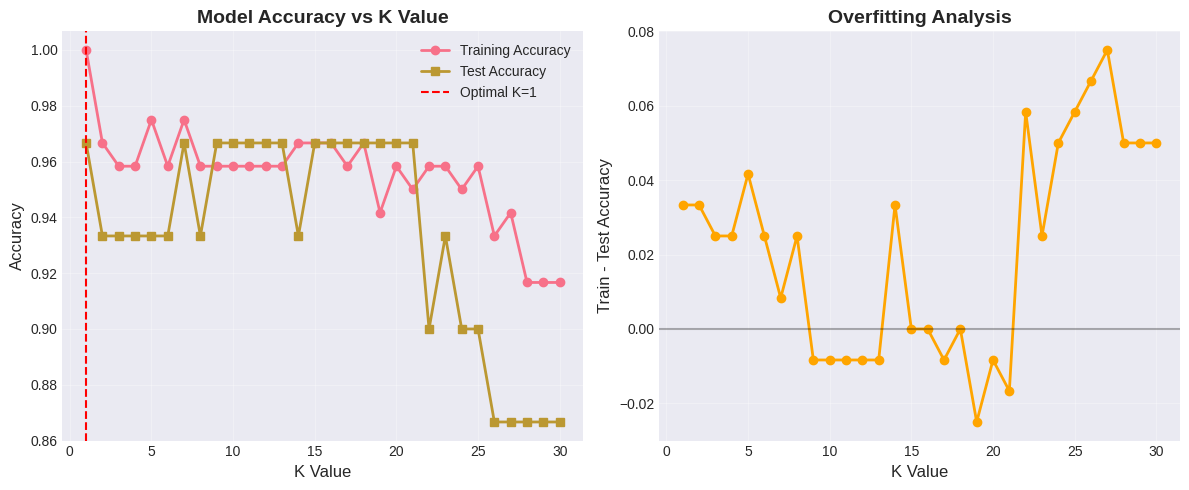

In [5]:
k_values = range(1, 31)
train_scores = []
test_scores = []

print("\n" + "="*60)
print("EXPERIMENTING WITH DIFFERENT K VALUES")
print("="*60)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

    if k <= 10 or k % 5 == 0:
        print(f"K={k:2d} | Train Accuracy: {train_score:.4f} | Test Accuracy: {test_score:.4f}")

# Find optimal K
optimal_k = k_values[np.argmax(test_scores)]
print(f"\nOptimal K value: {optimal_k} (Test Accuracy: {max(test_scores):.4f})")

# Plot K vs Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, train_scores, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(k_values, test_scores, 's-', label='Test Accuracy', linewidth=2)
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K={optimal_k}')
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy vs K Value', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot the difference between train and test accuracy
plt.subplot(1, 2, 2)
overfitting = np.array(train_scores) - np.array(test_scores)
plt.plot(k_values, overfitting, 'o-', color='orange', linewidth=2)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Train - Test Accuracy', fontsize=12)
plt.title('Overfitting Analysis', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Training Accuracy: 1.0000
Test Accuracy: 0.9667
CLASSIFICATION REPORT (Test Set)
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



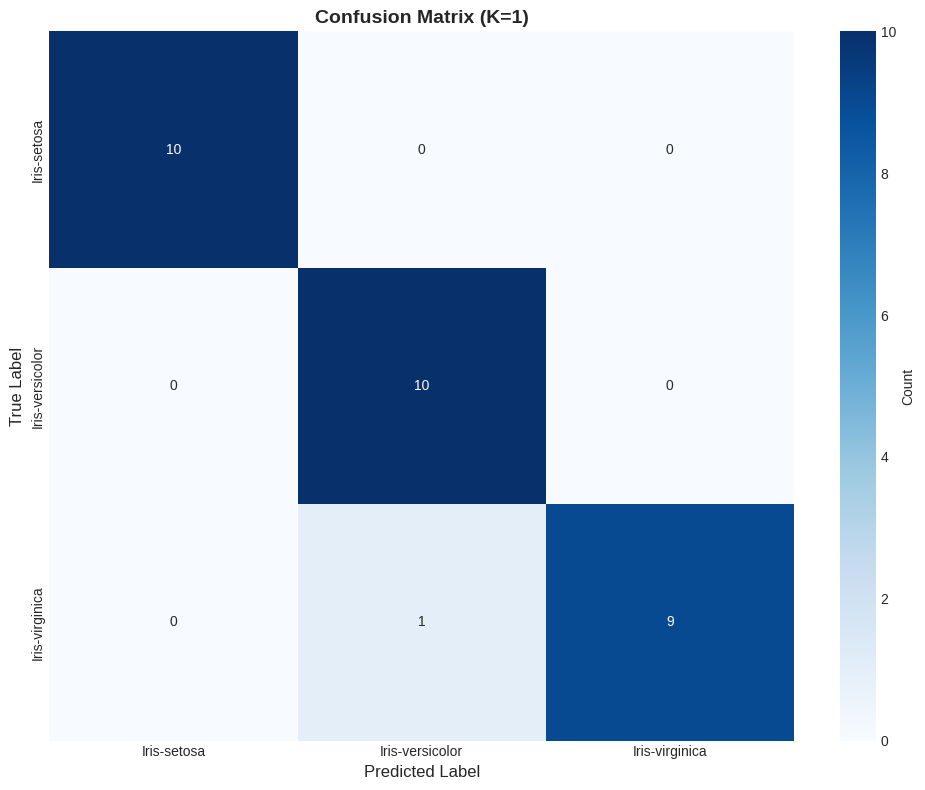

In [6]:
# Train final model with optimal K
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = final_knn.predict(X_train_scaled)
y_test_pred = final_knn.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report
print("CLASSIFICATION REPORT (Test Set)")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
species_names = sorted(df['Species'].unique())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=species_names, yticklabels=species_names,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix (K={optimal_k})', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

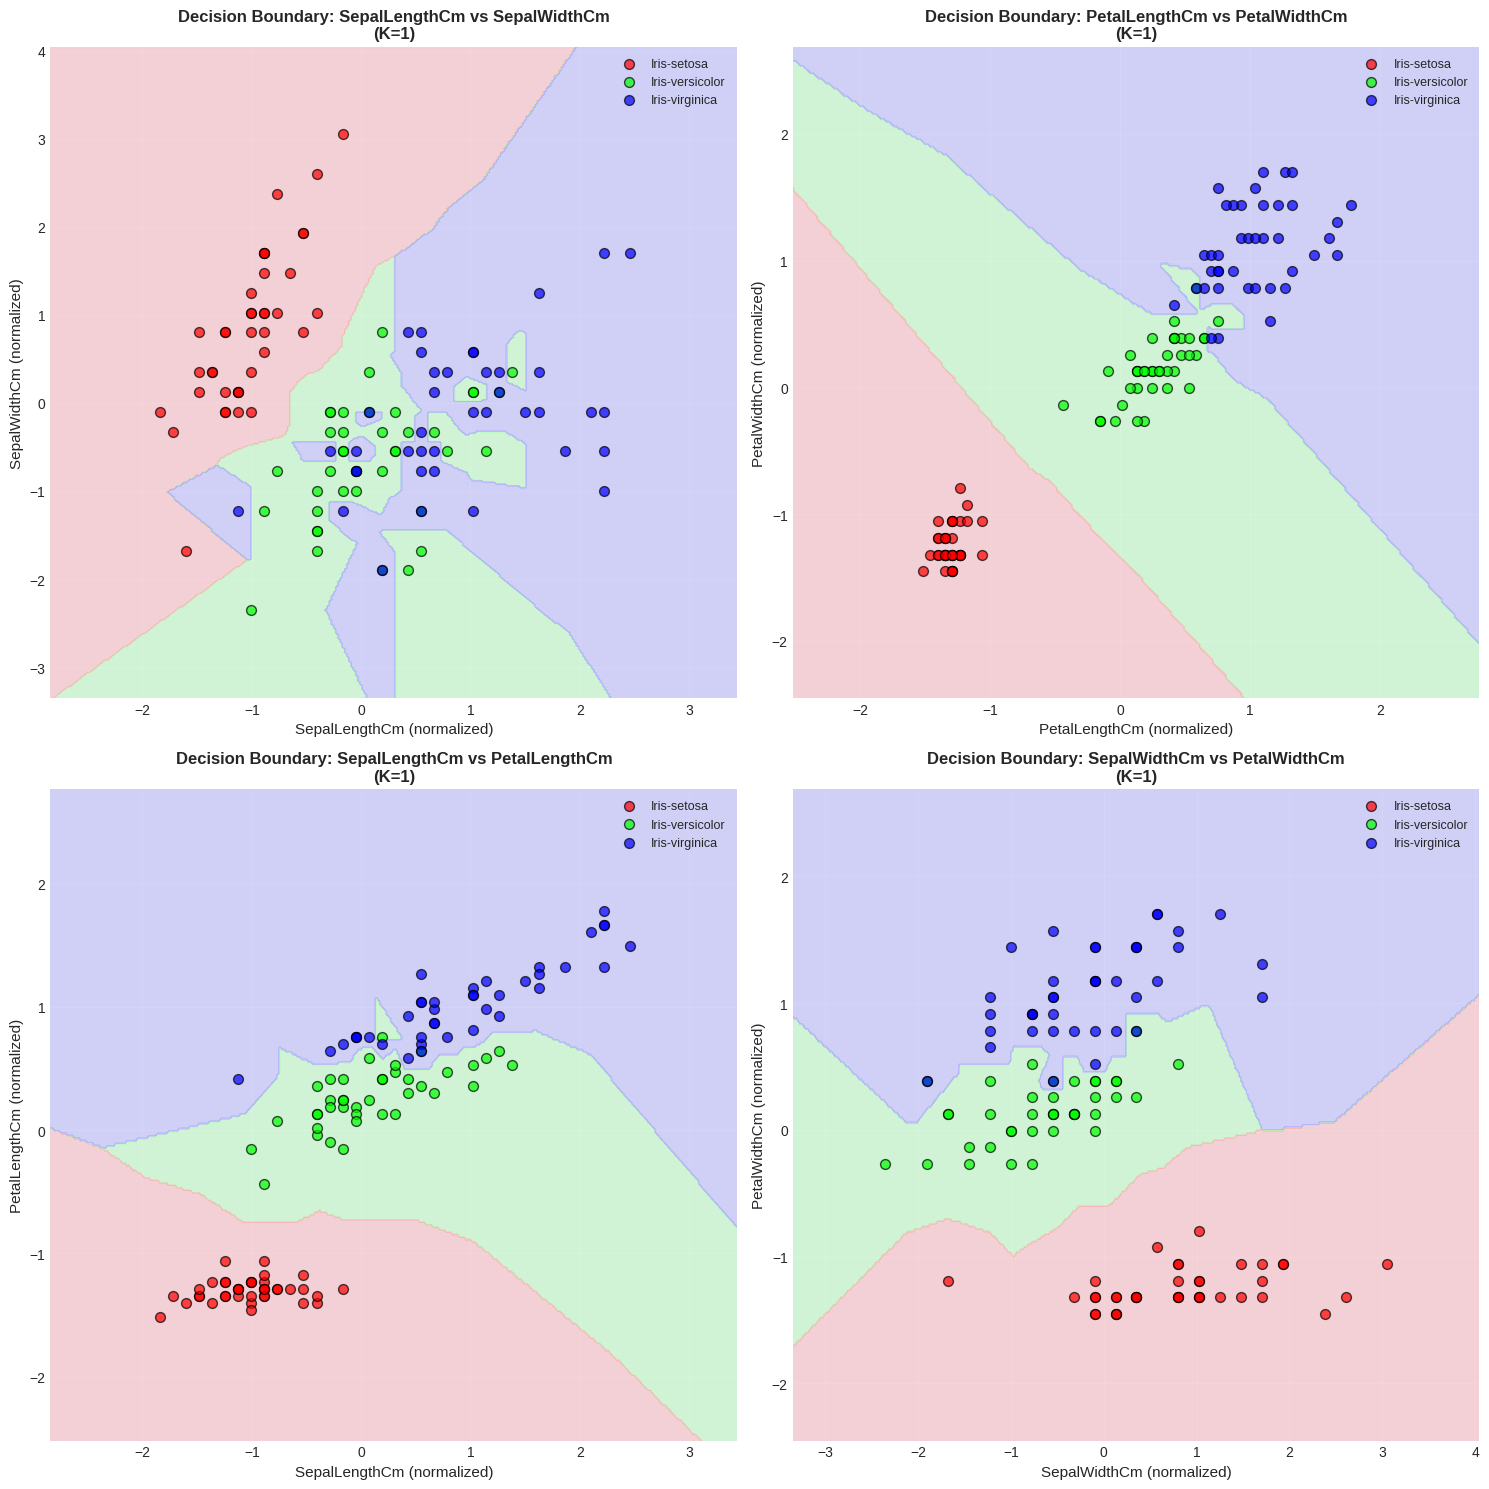

In [7]:
feature_pairs = [
    (0, 1, 'SepalLengthCm', 'SepalWidthCm'),
    (2, 3, 'PetalLengthCm', 'PetalWidthCm'),
    (0, 2, 'SepalLengthCm', 'PetalLengthCm'),
    (1, 3, 'SepalWidthCm', 'PetalWidthCm')
]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

# Color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

# Encode species for plotting
species_to_int = {species: i for i, species in enumerate(species_names)}
y_train_encoded = y_train.map(species_to_int)

for idx, (feat1, feat2, name1, name2) in enumerate(feature_pairs):
    # Get two features
    X_pair = X_train_scaled[:, [feat1, feat2]]

    # Train KNN on these two features
    knn_pair = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_pair.fit(X_pair, y_train)

    # Create mesh
    h = 0.02  # step size in the mesh
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on mesh
    Z = knn_pair.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_encoded = pd.Series(Z).map(species_to_int)
    Z_encoded = Z_encoded.values.reshape(xx.shape)

    # Plot
    axes[idx].contourf(xx, yy, Z_encoded, cmap=cmap_light, alpha=0.4)

    # Plot training points
    for i, species in enumerate(species_names):
        mask = y_train == species
        axes[idx].scatter(X_pair[mask, 0], X_pair[mask, 1],
                         c=cmap_bold[i], label=species,
                         edgecolors='black', s=50, alpha=0.7)

    axes[idx].set_xlabel(f'{name1} (normalized)', fontsize=11)
    axes[idx].set_ylabel(f'{name2} (normalized)', fontsize=11)
    axes[idx].set_title(f'Decision Boundary: {name1} vs {name2}\n(K={optimal_k})',
                       fontsize=12, fontweight='bold')
    axes[idx].legend(loc='best', fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
print("SUMMARY")
print(f"Dataset: Iris (150 samples, 3 classes)")
print(f"Features: 4 (all normalized using StandardScaler)")
print(f"Train/Test Split: {len(X_train)}/{len(X_test)}")
print(f"Optimal K: {optimal_k}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")
print(f"Model: K-Nearest Neighbors Classifier")

SUMMARY
Dataset: Iris (150 samples, 3 classes)
Features: 4 (all normalized using StandardScaler)
Train/Test Split: 120/30
Optimal K: 1
Final Test Accuracy: 0.9667
Model: K-Nearest Neighbors Classifier
